## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Importing the relevant packages  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

##Box Office Data Analysis

In [ ]:
Opening the Born Movie Gross Data Files

In [21]:
box_office_df = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [23]:
box_office_df.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [24]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
#foreign gross in object with some values with a ",". Need to create clean version without "," so that we can convert
#foreign gross to a float (like the domestic gross)

box_office_df["foreign_gross_clean"] = box_office_df["foreign_gross"].str.replace("," , "")


In [26]:
#check that the command created a clean column
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean
0,Toy Story 3,BV,415000000.0,652000000,2010,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,664300000
3,Inception,WB,292600000.0,535700000,2010,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,513900000


Convert the foreign_gross_clean from object to float

In [27]:
box_office_df["foreign_gross_clean"] = box_office_df["foreign_gross_clean"].astype(float)
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3387 non-null   object 
 1   studio               3382 non-null   object 
 2   domestic_gross       3359 non-null   float64
 3   foreign_gross        2037 non-null   object 
 4   year                 3387 non-null   int64  
 5   foreign_gross_clean  2037 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 158.9+ KB


Replace foreign_gross with the new foreign_gross_clean (which is without commas and as a float)
Check that foreign_gross is now replaced with the clean, float version 

In [28]:
box_office_df.drop(columns = ["foreign_gross"])
box_office_df["foreign_gross"] = box_office_df["foreign_gross_clean"]
box_office_df.drop(columns = ["foreign_gross_clean"])
box_office_df.info()
                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3387 non-null   object 
 1   studio               3382 non-null   object 
 2   domestic_gross       3359 non-null   float64
 3   foreign_gross        2037 non-null   float64
 4   year                 3387 non-null   int64  
 5   foreign_gross_clean  2037 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


Create new variable "Total_Gross" that combines domestic_gross and foreign_gross totals

In [29]:
box_office_df["total_gross"] = box_office_df["domestic_gross"] + box_office_df["foreign_gross"]


Convert total_gross to be displayed in millions 

In [30]:
box_office_df["total_gross_millions"] = box_office_df["total_gross"] / 1000000
box_office_df

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean,total_gross,total_gross_millions
0,Toy Story 3,BV,415000000.0,652000000.0,2010,652000000.0,1.067000e+09,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,691300000.0,1.025500e+09,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,664300000.0,9.603000e+08,960.3
3,Inception,WB,292600000.0,535700000.0,2010,535700000.0,8.283000e+08,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,513900000.0,7.526000e+08,752.6
...,...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN,NaN,NaN


Lets look at the movies with the greatest domestic_gross, greatest foreign_gross, and greatest total_gross_millions

In [41]:
top_25_domestic_gross = box_office_df.sort_values(by = "domestic_gross", ascending = False).head(25)
top_25_domestic_gross

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean,total_gross,total_gross_millions
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,1131.6,9.367011e+08,936.701132
3080,Black Panther,BV,700100000.0,646900000.0,2018,646900000.0,1.347000e+09,1347.000000
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,1369.5,6.788014e+08,678.801369
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,1019.4,6.523010e+08,652.301019
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,895500000.0,1.518900e+09,1518.900000
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,712400000.0,1.332600e+09,1332.600000
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,634200000.0,1.242800e+09,1242.800000
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,523900000.0,1.056100e+09,1056.100000
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,759500000.0,1.263500e+09,1263.500000
2324,Finding Dory,BV,486300000.0,542300000.0,2016,542300000.0,1.028600e+09,1028.600000


In [36]:
top_10_foreign_gross = box_office_df.sort_values(by = "foreign_gross", ascending = False).head(10)
top_10_foreign_gross

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean,total_gross,total_gross_millions
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,960500000.0,1.341500e+09,1341.5
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,946400000.0,1.405400e+09,1405.4
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,895500000.0,1.518900e+09,1518.9
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,891800000.0,1.309500e+09,1309.5
1127,Frozen,BV,400700000.0,875700000.0,2013,875700000.0,1.276400e+09,1276.4
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,867600000.0,8.703000e+08,870.3
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,858600000.0,1.104000e+09,1104.0
1876,Minions,Uni.,336000000.0,823400000.0,2015,823400000.0,1.159400e+09,1159.4
3083,Aquaman,WB,335100000.0,812700000.0,2018,812700000.0,1.147800e+09,1147.8
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,805800000.0,1.214800e+09,1214.8


In [37]:
top_10_total_gross = box_office_df.sort_values(by = "total_gross_millions", ascending = False).head(10)
top_10_total_gross 

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean,total_gross,total_gross_millions
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,895500000.0,1.518900e+09,1518.9
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,946400000.0,1.405400e+09,1405.4
3080,Black Panther,BV,700100000.0,646900000.0,2018,646900000.0,1.347000e+09,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,960500000.0,1.341500e+09,1341.5
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,712400000.0,1.332600e+09,1332.6
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,891800000.0,1.309500e+09,1309.5
1127,Frozen,BV,400700000.0,875700000.0,2013,875700000.0,1.276400e+09,1276.4
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,759500000.0,1.263500e+09,1263.5
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,634200000.0,1.242800e+09,1242.8
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,805800000.0,1.214800e+09,1214.8


Scatter plots to see the correlations between foreign and domestic box office performance

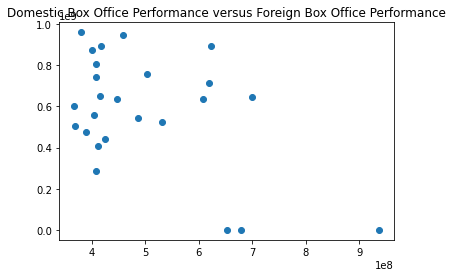

In [42]:
fig, ax = plt.subplots()
x = top_25_domestic_gross["domestic_gross"] 
y = top_25_domestic_gross["foreign_gross"]
ax.scatter(x, y)
ax.set_title("Domestic Box Office Performance versus Foreign Box Office Performance");

Create new data frame from movies that have premeired in the last three years 
The data currently covers movies from 2010 - 2018 (as shown with a df.describe()
Would want to find out stats about more recent movies. 

In [24]:
box_office_recent_df = box_office_df[(box_office_df["year"] >= 2016)]
box_office_recent_df.head()

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_clean
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,745200000.0
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,523900000.0
2324,Finding Dory,BV,486300000.0,542300000.0,2016,542300000.0
2325,Zootopia,BV,341300000.0,682500000.0,2016,682500000.0
2326,The Jungle Book (2016),BV,364000000.0,602500000.0,2016,602500000.0


In [25]:
box_office_recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 2322 to 3386
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1065 non-null   object 
 1   studio               1064 non-null   object 
 2   domestic_gross       1061 non-null   float64
 3   foreign_gross        546 non-null    float64
 4   year                 1065 non-null   int64  
 5   foreign_gross_clean  546 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 58.2+ KB


## IMDB Data File Analysis

In [ ]:
import sqlite3

In [10]:
import zipfile
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
con = sqlite3.connect('./zippedData/im.db')

In [11]:
df_imdb = pd.read_sql_query("Select * from movie_ratings", con) 

In [12]:
df_imdb.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
df_imdb_movie_basics = pd.read_sql_query("SELECT * from movie_basics", con)
df_imdb_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# The Movie Database Data Set

In [47]:
tmdb_df = pd.read_csv("./zippedData/tmdb.movies.csv.gz")
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [50]:
tmdb_df["vote_count"].mean()

194.22483689708488

In [51]:
tmdb_df["vote_count"].median()

5.0

In [59]:
#Drop all rows with vote counts below the mean number of vote counts
tmdb_vote_counts_df = tmdb_df.drop(tmdb_df.vote_count =< 195)
tmdb_vote_counts_df

SyntaxError: invalid syntax (<ipython-input-59-7c9b2d799002>, line 2)

In [57]:
top_200_votes_df = tmdb_df.sort_values(by = "vote_average", ascending = False)
top_200_votes_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1
